In [2]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 35.2 MB/s eta 0:00:00


In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [8]:
demand = ctrl.Antecedent(np.arange(0, 101, 1), 'demand')
competitor_price = ctrl.Antecedent(np.arange(0, 101, 1), 'competitor_price')
production_cost = ctrl.Antecedent(np.arange(0, 101, 1), 'production_cost')
seasonality = ctrl.Antecedent(np.arange(0, 101, 1), 'seasonality')
stock_level = ctrl.Antecedent(np.arange(0, 101, 1), 'stock_level')


In [9]:

final_price = ctrl.Consequent(np.arange(0, 101, 1), 'final_price')

In [10]:
demand['low'] = fuzz.trimf(demand.universe, [0, 0, 50])
demand['medium'] = fuzz.trimf(demand.universe, [25, 50, 75])
demand['high'] = fuzz.trimf(demand.universe, [50, 100, 100])

competitor_price['very_low'] = fuzz.trimf(competitor_price.universe, [0, 0, 25])
competitor_price['low'] = fuzz.trimf(competitor_price.universe, [0, 25, 50])
competitor_price['medium'] = fuzz.trimf(competitor_price.universe, [25, 50, 75])
competitor_price['high'] = fuzz.trimf(competitor_price.universe, [50, 100, 100])

production_cost['low'] = fuzz.trimf(production_cost.universe, [0, 0, 50])
production_cost['medium'] = fuzz.trimf(production_cost.universe, [25, 50, 75])
production_cost['high'] = fuzz.trimf(production_cost.universe, [50, 100, 100])

seasonality['off_peak'] = fuzz.trimf(seasonality.universe, [0, 0, 50])
seasonality['normal'] = fuzz.trimf(seasonality.universe, [25, 50, 75])
seasonality['peak'] = fuzz.trimf(seasonality.universe, [50, 100, 100])

stock_level['very_high'] = fuzz.trimf(stock_level.universe, [75, 100, 100])
stock_level['high'] = fuzz.trimf(stock_level.universe, [50, 75, 100])
stock_level['medium'] = fuzz.trimf(stock_level.universe, [25, 50, 75])
stock_level['low'] = fuzz.trimf(stock_level.universe, [0, 25, 50])
stock_level['very_low'] = fuzz.trimf(stock_level.universe, [0, 0, 25])

final_price['very_low'] = fuzz.trimf(final_price.universe, [0, 0, 25])
final_price['low'] = fuzz.trimf(final_price.universe, [0, 25, 50])
final_price['medium'] = fuzz.trimf(final_price.universe, [25, 50, 75])
final_price['high'] = fuzz.trimf(final_price.universe, [50, 75, 100])
final_price['very_high'] = fuzz.trimf(final_price.universe, [75, 100, 100])


In [11]:
rule1 = ctrl.Rule(demand['high'] & competitor_price['high'] & stock_level['low'], final_price['very_high'])
rule2 = ctrl.Rule(demand['high'] & seasonality['peak'] & stock_level['low'], final_price['very_high'])
rule3 = ctrl.Rule(demand['medium'] & production_cost['high'] & stock_level['low'], final_price['very_high'])

rule4 = ctrl.Rule(demand['high'] & competitor_price['medium'] & stock_level['medium'], final_price['high'])
rule5 = ctrl.Rule(demand['medium'] & competitor_price['high'] & stock_level['low'], final_price['high'])
rule6 = ctrl.Rule(demand['high'] & seasonality['peak'] & stock_level['medium'], final_price['high'])

rule7 = ctrl.Rule(demand['medium'] & competitor_price['medium'] & stock_level['medium'], final_price['medium'])
rule8 = ctrl.Rule(demand['low'] & competitor_price['high'] & stock_level['medium'], final_price['medium'])
rule9 = ctrl.Rule(demand['medium'] & production_cost['medium'] & stock_level['medium'], final_price['medium'])

rule10 = ctrl.Rule(demand['low'] & competitor_price['low'] & stock_level['high'], final_price['low'])
rule11 = ctrl.Rule(demand['medium'] & production_cost['low'] & stock_level['high'], final_price['low'])
rule12 = ctrl.Rule(demand['low'] & seasonality['off_peak'] & stock_level['high'], final_price['low'])

rule13 = ctrl.Rule(demand['low'] & competitor_price['low'] & stock_level['very_high'], final_price['very_low'])
rule14 = ctrl.Rule(demand['low'] & seasonality['off_peak'] & stock_level['very_high'], final_price['very_low'])
rule15 = ctrl.Rule(demand['medium'] & competitor_price['very_low'] & stock_level['very_high'], final_price['very_low'])


In [12]:
pricing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,
                                rule10, rule11, rule12, rule13, rule14, rule15])
pricing = ctrl.ControlSystemSimulation(pricing_ctrl)

Giá đề xuất: 90.71428571428575


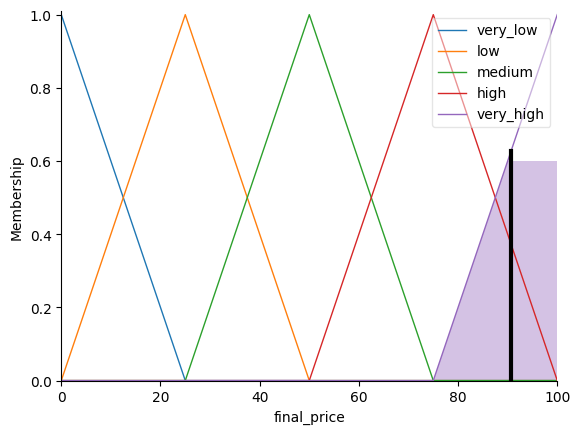

In [13]:

pricing.input['demand'] = 80
pricing.input['competitor_price'] = 85
pricing.input['production_cost'] = 60
pricing.input['seasonality'] = 90
pricing.input['stock_level'] = 20


pricing.compute()


print("Giá đề xuất:", pricing.output['final_price'])
final_price.view(sim=pricing)